In [9]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

%matplotlib inline

In [2]:
plt.rc("font", family="NanumGothic Eco")
matplotlib.rc("axes", unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

In [4]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv")
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


# T-test

### 1. Brand

In [23]:
# 전체 가격의 평균 계산
overall_mean = Car_raw['Price'].mean()

# 브랜드 목록
brands = Car_raw['Brand'].unique()

# t-검정 결과 저장용 데이터프레임
t_test_results = pd.DataFrame(columns=['Brand', 't-statistic', 'p-value'])

# 각 브랜드에 대해 t-검정 수행
for brand in brands:
    # 해당 브랜드의 가격 데이터 추출
    price_brand = Car_raw[Car_raw['Brand'] == brand]['Price']
    
    # t-검정 수행: 브랜드의 가격 데이터와 전체 평균 비교
    t, p = ttest_1samp(price_brand, overall_mean)
    
    # 결과 저장
    t_test_results = t_test_results.append({
        'Brand': brand,
        't-statistic': t,
        'p-value': p
    }, ignore_index=True)

# 결과 출력
print(t_test_results)


            Brand  t-statistic        p-value
0      AMBASSADOR          NaN            NaN
1            AUDI    21.603549   9.655508e-62
2         BENTLEY     0.790505   5.741495e-01
3             BMW    18.217827   1.349716e-50
4       CHEVROLET   -45.397453   3.764993e-89
5          DATSUN   -19.616102   1.289909e-12
6            FIAT   -12.024526   3.300256e-13
7           FORCE    -0.152977   8.924564e-01
8            FORD    -6.920403   2.239835e-11
9           HONDA   -43.092542  1.092279e-203
10        HYUNDAI   -41.275174  4.643426e-237
11          ISUZU     1.460145   2.816856e-01
12         JAGUAR    11.377018   4.237922e-15
13           JEEP    15.191124   1.042729e-11
14    LAMBORGHINI          NaN            NaN
15           LAND    10.076989   3.460358e-14
16       MAHINDRA    -7.342680   1.686192e-12
17         MARUTI   -81.274227   0.000000e+00
18  MERCEDES-BENZ    20.325781   7.190615e-62
19           MINI    14.916687   2.032904e-15
20     MITSUBISHI     3.070196   4

- 유의미한 브랜드: AUDI와 BMW, MERCEDES-BENZ는 가격이 전체 평균보다 높으며, 가격에 유의미한 영향을 미친다. 반면 CHEVROLET와 HONDA는 가격이 전체 평균보다 낮고, 가격에 유의미한 영향을 미친다. 
- 무의미한 브랜드: BENTLEY, ISUZU, FORCE는 P-value가 높아 가격이 전체 평균과 통계적으로 유의미한 차이를 보이지 않는다. 

### 2. Location

In [5]:
Car_raw['Location'].unique()

array(['Chennai', 'Ahmedabad', 'Mumbai', 'Hyderabad', 'Delhi', 'Kolkata',
       'Bangalore', 'Kochi', 'Coimbatore', 'Pune', 'Jaipur'], dtype=object)

In [24]:
locations = Car_raw['Location'].unique()

t_test_results = pd.DataFrame(columns=['Location', 't-statistic', 'p-value'])

for loc in locations:
    price_loc = Car_raw[Car_raw['Location'] == loc]['Price']
    t, p= ttest_1samp(price_loc, overall_mean)
    t_test_results = t_test_results.append({
        'Location': loc,
        't-statistic': t,
        'p-value': p
    }, ignore_index=True)

print(t_test_results)

      Location  t-statistic       p-value
0      Chennai    -5.179116  3.098599e-07
1    Ahmedabad    -1.558202  1.203743e-01
2       Mumbai     0.002207  9.982394e-01
3    Hyderabad     1.135346  2.565513e-01
4        Delhi     1.038354  2.994907e-01
5      Kolkata   -12.231934  4.775788e-31
6    Bangalore     5.618485  3.503303e-08
7        Kochi     3.877791  1.145069e-04
8   Coimbatore     9.516892  2.309692e-20
9         Pune   -10.544966  2.620544e-24
10      Jaipur   -12.701604  4.278017e-32


- 유의미한 위치: Chennai, Kolkata, Bangalore, Kochi, Coimbatore, Pune, Jaipur는 가격과 유의미한 관계가 있으며, 특히 Chennai와 Kolkata는 가격이 평균보다 낮고 Bangalore와 Coimbatore는 가격이 평균보다 높은 것으로 나타났다.
- 비유의미한 위치: Ahmedabad, Mumbai, Hyderabad, Delhi는 가격에 대한 유의미한 영향을 미치지 않으므로, 이들을 통해 가격 변화에 대한 인사이트를 얻기 어렵다.

### 3. Fuel_Type

In [12]:
Car_raw['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [25]:
fuel_types = Car_raw['Fuel_Type'].unique()

t_test_results = pd.DataFrame(columns=['Fuel_Type', 't-statistic', 'p-value'])

for fuel in fuel_types:
    price_fuel = Car_raw[Car_raw['Fuel_Type'] == fuel]['Price']
    t, p = ttest_1samp(price_fuel, overall_mean)
    t_test_results = t_test_results.append({
        'Fuel_Type': fuel,
        't-statistic': t,
        'p-value': p
    }, ignore_index=True)

print(t_test_results)

  Fuel_Type  t-statistic        p-value
0    Diesel    15.855799   7.202116e-55
1    Petrol   -28.689828  2.324655e-161
2       CNG   -33.382969   1.870128e-40
3       LPG   -22.238960   1.707181e-10


* Diesel은 가격이 전체 평균보다 유의미하게 높은 반면, Petrol, CNG, LPG는 가격이 평균보다 유의미하게 낮다는 결과를 보여준다.

### 4. Transmission

In [26]:
Car_raw['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [27]:
Transmissions = Car_raw['Transmission'].unique()

t_test_results = pd.DataFrame(columns=['Transmission', 't-statistic', 'p-value'])

for fuel in Transmissions:
    Transmission = Car_raw[Car_raw['Transmission'] == fuel]['Price']
    t, p = ttest_1samp(price_fuel, overall_mean)
    t_test_results = t_test_results.append({
        'Transmission': fuel,
        't-statistic': t,
        'p-value': p
    }, ignore_index=True)

print(t_test_results)

  Transmission  t-statistic       p-value
0       Manual    -22.23896  1.707181e-10
1    Automatic    -22.23896  1.707181e-10


* Manual과 Automatic 두 전송 방식 모두 p-값이 1.71×10−101.71×10−10으로 매우 낮다. 이는 두 전송 방식의 가격이 전체 평균 가격에 비해 유의미하게 낮다는 것을 의미한다

### 5. Owner_Type

In [28]:
owner_types = Car_raw['Owner_Type'].unique()

t_test_results = pd.DataFrame(columns=['Owner_Type', 't-statistic', 'p-value'])

for owner in owner_types:
    price_owner = Car_raw[Car_raw['Owner_Type'] == owner]['Price']
    t, p = ttest_1samp(price_owner, overall_mean)
    t_test_results = t_test_results.append({
        'Owner_Type': owner,
        't-statistic': t,
        'p-value': p
    }, ignore_index=True)
    
print(t_test_results)

       Owner_Type  t-statistic       p-value
0           Third    -3.856156  1.840012e-04
1           First     2.990103  2.800464e-03
2          Second    -6.592245  6.712011e-11
3  Fourth & Above   -15.132901  3.598652e-07


* Third, Second, Fourth & Above는 가격이 전체 평균보다 유의미하게 낮고, First는 가격이 전체 평균보다 유의미하게 높다.

# ANOVA 

In [34]:
from scipy.stats import f_oneway

# 데이터프레임 로드 (여기서는 예시로 Car_raw 사용)
# Car_raw = pd.read_csv("path_to_your_data.csv")  # 실제 데이터 로드하는 부분

# ANOVA를 사용할 범주형 변수 목록
categorical_vars = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# ANOVA 결과 저장용 데이터프레임
anova_results = pd.DataFrame(columns=['Category', 'F-statistic', 'p-value'])

for cat in categorical_vars:
    # 각 범주형 변수의 고유 값으로 그룹화하여 가격 데이터 추출
    groups = [group['Price'].values for name, group in Car_raw.groupby(cat)]
    
    # ANOVA 수행
    f_stat, p_val = f_oneway(*groups)
    
    # 결과 저장
    anova_results = anova_results.append({
        'Category': cat,
        'F-statistic': f_stat,
        'p-value': p_val
    }, ignore_index=True)

# 결과 출력
print(anova_results)


       Category  F-statistic        p-value
0         Brand   358.958448   0.000000e+00
1      Location    43.326692   3.616612e-84
2     Fuel_Type   263.467678  4.241112e-162
3  Transmission  3613.451837   0.000000e+00
4    Owner_Type    19.815982   8.696996e-13


ANOVA 결과에 따르면, 모든 범주형 변수(Brand, Location, Fuel_Type, Transmission, Owner_Type)는 가격에 유의미한 영향을 미친다. 특히, Transmission의 F-통계량이 3613.45로 가장 높고 p-값이 0.000000으로 극히 낮다. 결론적으로, Transmission이 가격에 가장 큰 영향을 미치고, 그 다음으로 Brand, Fuel_Type, Location, Owner_Type의 순서로 영향을 미친다고 할 수 있다.

# 상관분석

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# 상관 분석
correlation_matrix = Car_raw[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']].corr()

# 결과 출력
print(correlation_matrix['Price'])

Year                 0.289879
Kilometers_Driven   -0.163969
Mileage             -0.325087
Engine               0.631356
Power                0.750653
Seats                0.058058
Price                1.000000
Name: Price, dtype: float64


Year: 상관계수 0.2899는 약한 양의 상관관계를 나타낸다. 이는 차량의 연식이 증가할수록 가격이 다소 상승하는 경향이 있지만, 그 관계는 강하지 않음을 의미한다.

Kilometers_Driven: 상관계수 -0.1639로 약한 음의 상관관계를 보인다. 이는 주행 거리가 많아질수록 가격이 다소 하락하는 경향이 있음을 나타낸다.

Mileage: 상관계수 -0.3251로 음의 상관관계가 있다. 이는 연비가 높을수록 가격이 낮아지는 경향이 있음을 의미한다. 

Engine: 상관계수 0.6314로 양의 상관관계를 보인다. 이는 엔진 크기가 클수록 차량 가격이 높아지는 경향이 있음을 나타낸다. 

Power: 상관계수 0.7507로 매우 강한 양의 상관관계를 나타낸다. 이는 차량의 출력이 높을수록 가격이 상승하는 경향이 매우 뚜렷하다는 것을 보여준다. 

Seats: 상관계수 0.0581로 매우 낮은 양의 상관관계를 보인다. 이는 차량의 좌석 수와 가격 간의 관계가 거의 없음을 나타내며, 좌석 수가 가격에 미치는 영향이 크지 않다는 것을 의미한다.



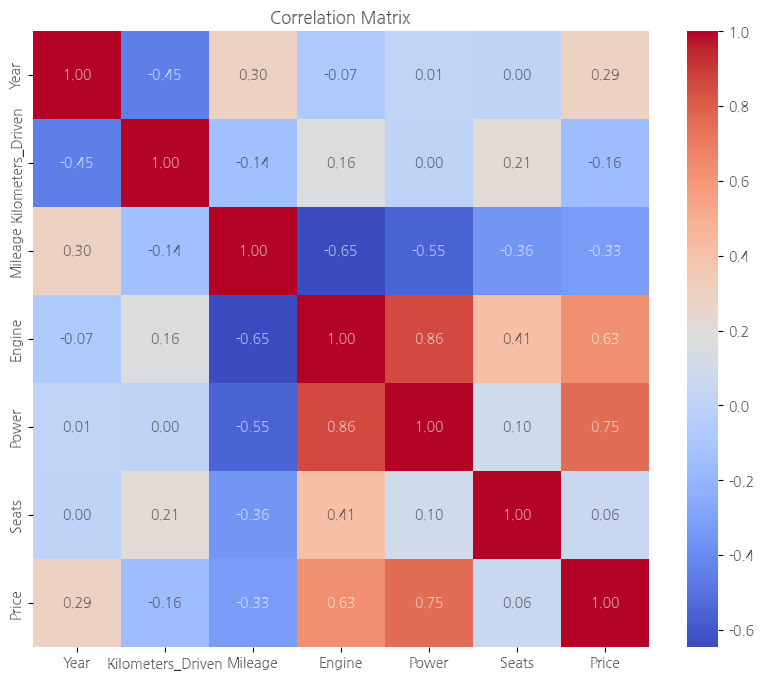

In [33]:
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

상관관계의 강도: Power와 Engine이 가격과 강한 양의 상관관계를 보이며, Mileage는 가격과 음의 상관관계를 가지고 있다. Year와 Kilometers_Driven은 각각 약한 양의 및 음의 상관관계를 나타내며, Seats는 가격에 거의 영향을 미치지 않는 것으로 나타난다.